# Riscos Quimicos na Segurança do Trabalho

### O que é e quando ocorre

O risco químico é um tipo de risco ambiental tal qual os físicos e biológicos, porém o risco químico trata da probabilidade da exposição do trabalhador à agentes químicos, que geralmente são danosos à nossa saúde.

Nos ambientes de trabalho, a exposição dérmica ocorre geralmente como resultado de projeção de líquidos. Dependendo das características físico-químicas, os agentes podem ser absorvidos
ou simplesmente permanecerem na superfície da pele. Em ambos os casos, podem alterar,
danificar ou ainda comprometer o funcionamento do órgão e contribuir para o aparecimento
do dano. Portanto, a exposição dérmica deve ser considerada um componente importante na avaliação da exposição ocupacional aos diversos agentes presentes nos ambientes de trabalho.

---

### Agentes Químicos

Os agentes químicos são substâncias ou compostos que possam penetrar no organismo por meio da respiração, em forma de poeiras, fumos, névoas, neblinas, gases ou vapores, ou também, dependendo da atividade que é realizada e da maneira que o agente é manipulado possam ter contato ou ser absorvidos através da pele ou até mesmo por ingestão.

## Análise de Acidentes de Trabalho (CAT) - Riscos Químicos

Neste notebook, analisamos as Comunicações de Acidente de Trabalho (CAT) no Brasil,
com foco em agentes **químicos**. Foram usados os dados públicos oferecidos no site do governo. No site temos acessos aos dados das CATs (Comunicação de Acidente de Trabalho) apartir de junho de 2023 à junho de 2025. 

Referencia: https://dados.gov.br/dados/conjuntos-dados/comunicacoes-de-acidente-de-trabalho-cat-plano-de-dados-abertos-jun-2023-a-jun-2025


### O que são as CATs

Usada para comunicar ao INSS que determinado funcionário sofreu um acidente de trabalho ou doença ocupacional, a CAT é um documento utilizado para medir estatísticas de acidente e de trajeto da Previdência Social.

Podendo ser emitida até mesmo online, a CAT chega no banco de dados do INSS em poucos segundos após ser expedida. Somente a partir desse procedimento, o trabalhador acidentado, ou vítima de alguma doença ocupacional, poderá receber o amparo da Previdência.

In [ ]:
import pandas as pd 
import glob 
import os
import re 
import unidecode
import matplotlib.pyplot as plt
import seaborn as sns

## Carregamento dos dados
Nesta etapa, lemos todos os arquivos CSV disponibilizados no portal de dados.gov.br,
padronizamos as colunas e unificamos em um único DataFrame.

(Use o shift + enter para execultar os codigos)

In [15]:
caminho = '../dados/*.csv'

arquivos_csv = glob.glob(caminho)

print(f"Total de arquivos encontrados: {len(arquivos_csv)}")

lista_df = []

padrao_data = re.compile(r'\.(\d{6})\.csv$')

for arquivo in arquivos_csv:
    nome_arquivo = os.path.basename(arquivo)
    
    match = padrao_data.search(nome_arquivo)
    if match:
        ano_mes = match.group(1)
    else: 
        ano_mes = 'desconhecido'
        
    df = pd.read_csv(arquivo, encoding='latin1', sep=';', on_bad_lines='skip')
    
    df['ano_mes'] = ano_mes
    
    lista_df.append(df)
    

col = 'Agente Causador Acidente'
df_total = pd.concat(lista_df, ignore_index=True)
df_total.columns = df_total.columns.str.replace(r'\s+', ' ', regex=True)
df_total[col] = df_total[col].astype(str).str.strip().str.lower().apply(lambda x: unidecode.unidecode(x))


print("\nAmostra dos dados carregados:")
print(df_total.head())

Total de arquivos encontrados: 24

Amostra dos dados carregados:
  Agente Causador Acidente Data Acidente     CBO                 CBO.1  \
0     temperatura muito ba    31/05/2023  841815  841815-Oper. Máquina   
1     atrito ou abrasao po    30/05/2023  514205  514205-Coletor Lixo    
2     temperatura muito al    31/05/2023  762005  762005-Trab. Polival   
3     atrito ou abrasao, n    30/05/2023  313315  313315-Tec. de Telec   
4     rua e estrada - supe    30/05/2023  422315  422315-Oper. Telemar   

   CID-10              CID-10.1  CNAE2.0 Empregador  CNAE2.0 Empregador.1  \
0  T139    T13.9 Traum Ne do Me                1093  Fabricacao de Produt   
1  T159    T15.9 Corpo Estranho                3811  Coleta de Residuos N   
2  T240    T24.0 Queim Quadr Me                1510  Curtimento e Outras    
3  S300    S30.0 Contusao do Do                6311  Tratamento de Dados,   
4  V288    {ñ class}                           1411  Confeccao de Roupas    

           Emitente CAT  Es

## Identificação de agentes químicos
Os agentes causadores foram classificados em categorias químicas com base em palavras-chave
e variações ortográficas.

In [ ]:
categorias = {
    'palavras_chaves': [
        'xileno', 'cloroformio', 'tricloroetileno', 'heptano',
        'acetato de etila', 'acetato',  'acetileno', 'nitroglicerina', 'dinamite', 'explosivo', 'detonador', 'explosao', 
        'teratogenico', 'fetal', 'fetais', 'gravidez', 'gestacao', 'pregnancy', 'embriao', 
        'chumbo', 'cadmio', 'cromo vi', 'cromo6', 'cromo hexavalente',
        'mutagenico', 'mutageno', 
        'amianto', 'cancerigeno', 'carcinoma', 'tumor', 
        'cianeto', 'mercurio', 'arsenico', 'benzeno', 'tolueno', 'solvente',
        'toxico', 'veneno', 
        'monoxido de carbono', 'monoxido carbono', 'monoxido', 'nitrogenio', 'gases nobres',
        'asfixiante', 'co2', 'dioxido de carbono', 
         'cloro', 'amonia', 'amoníaco', 'amoniaco', 'acido', 'acido muriatico', 'acido cloridrico',
        'acido sulfúrico', 'acido sulfurico', 'acido fluoridrico', 'alcool', 'etanol',
        'formaldeido', 'formol', 'irritante', 'vapores acidos', 'vapores alcalinos',
        'gas acido', 'gas alcalino', 'poluente', 'fumaca', 'poeira fina', 'particulas',
        'quimico', 'quimica', 'substancia', 'produto quimico', 'produto quimico perigoso',
        'composto quimico', 'composto', 'compostos', 'quimicos', 'substancias', 'materia prima',
        'material', 'materiais', 'toxicos', 'toxico', 'venenosos', 'venenos', 'venenoso', 'veneno'
    ]
}

erros_comuns = {
    'palavras_chaves': [
        'xileno', 'cloroformio', 'tricloroetilen', 'heptano',
        'acetato de etila', 'acetato', 'acetileno', 'nitroglicerin', 'dinamite', 'explosiv', 'detonador', 'explosa', 
        'teratogenico', 'fetal', 'fetais', 'gravidez', 'gestacao', 'pregnanc', 'embriao', 
        'chumbo', 'cadmio', 'cromo vi', 'cromo6', 'cromo hexavalent',
        'mutagenico', 'mutageno', 'amianto', 'cancerigeno', 'carcinoma', 'tumor', 
        'cianeto', 'mercurio', 'arsenic', 'benzeno', 'tolueno', 'solvent',
        'toxicos', 'toxico', 'veneno', 'monoxido de carbon', 'monoxido carbono', 'nitrogenio', 'gases nobr',
        'asfixiant', 'co2', 'dioxido de carbon', 'anestesic', 'gas anestesic', 'halotan', 'sevofluran', 
        'clor', 'clro', 'amonia', 'amoni', 'acido', 'acdo', 'alcool', 'alcool',
        'formaldei', 'formaldeid', 'formldeo', 'irritant', 'vapores acido', 'vapores alcalin',
        'gas acido', 'gas alcano', 'fumaca', 'poeira', 'particulas',
        'cimento', 'poeira', 'latex', 'latx', 'borracha', 'resina', 'epoxi',
        'sensibilizant', 'alergenico', 'alergico', 'mofo', 'fungo',
        'quimic', 'substancia', 'produto quimic', 'composto', 'materia prima',
        'material'  
    ]
}

# Junta as listas de palavras corretas + erros para cada categoria
categorias_e_erros = {}
for cat in categorias.keys():
    palavras_cat = categorias.get(cat, [])
    erros_cat = erros_comuns.get(cat, [])
    # Une listas e remove duplicatas
    categorias_e_erros[cat] = list(set(palavras_cat + erros_cat))

# Converte listas em regex pattern (palavras escapadas, separadas por "|")
regex_por_categoria = {
    cat: re.compile(r'(' + '|'.join(re.escape(palavra) for palavra in palavras) + r')', flags=re.IGNORECASE)
    for cat, palavras in categorias_e_erros.items()
}

# Função para classificar texto segundo regex
def classificar(texto):
    texto = str(texto).lower()
    for categoria, pattern in regex_por_categoria.items():
        if pattern.search(texto):
            return categoria
    return 'outros'

# Aplica a classificação
df_total['Categoria Quimica'] = df_total[col].apply(classificar)

# Filtra só as linhas que tiveram categoria válida (não 'outros')
df_filtrado = df_total[df_total['Categoria Quimica'] != 'outros'].copy()

# Exibe contagem das categorias filtradas
print(df_filtrado['Categoria Quimica'].value_counts())


Categoria Quimica
palavras_chaves    17470
Name: count, dtype: int64


## Observar os Dados 
A seguir, iremos nos certificar de que os dados separados estão corretos, para que nem um tenha vindo de forma errada e prejudique outras análises.

In [17]:
print("\nExemplos de classificação:")

n_exemplos = 15

for categoria in df_filtrado['Categoria Quimica'].unique():
    dados_categoria = df_filtrado[df_filtrado['Categoria Quimica'] == categoria][col].drop_duplicates()
    n_disponiveis = len(dados_categoria)
    
    n = min(n_exemplos, n_disponiveis)
    exemplos = dados_categoria.sample(n=n, random_state=42)
    
    print(f"\n{categoria}:")
    for exemplo in exemplos:
        print(f"- {exemplo}")



Exemplos de classificação:

palavras_chaves:
- cianeto ou composto
- equip. ou substancia
- fogo-chama,material
- composto de fosforo
- alcool
- nafta e solvente de
- substancia quimica,
- particulas - nao ide
- composto de arsenio
- composto metalico (d
- oxidos de nitrogenio
- composto organico ha
- monoxido de carbono
- acido
- composto aromatico (


In [18]:
df_filtrado.dtypes

Agente Causador Acidente        object
Data Acidente                   object
CBO                              int64
CBO.1                           object
CID-10                          object
CID-10.1                        object
CNAE2.0 Empregador               int64
CNAE2.0 Empregador.1            object
Emitente CAT                    object
Espécie do benefício            object
Filiação Segurado               object
Indica Óbito Acidente           object
Munic Empr                      object
Natureza da Lesão               object
Origem de Cadastramento CAT     object
Parte Corpo Atingida            object
Sexo                            object
Tipo do Acidente                object
UF Munic. Acidente              object
UF Munic. Empregador            object
Data Afastamento                object
Data Acidente.1                 object
Data Nascimento                 object
Data Acidente.2                 object
ano_mes                         object
Data Despacho Benefício  

In [19]:
df_filtrado['Data Acidente'] = pd.to_datetime(df_filtrado['Data Acidente'], errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_9324\806132723.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_filtrado['Data Acidente'] = pd.to_datetime(df_filtrado['Data Acidente'], errors='coerce')


## Corrigindo os Dados

Podemos ver que alguns dados estão errados, quando os dados foram separados, acidentes de origem orgânica foram adicionados junto, temos que removê-los. 

In [20]:
df_filtrado = df_filtrado[~df_filtrado[col].str.contains('organico', case=False, na=False)].copy()

## Classificando adequadamente

Após estratificação e correção dos dados, iremos separar eles em suas devidas categorias.

In [21]:
# dicionário de mapeamento dos agentes → categorias físico-químicas
mapa_categorias = {
    "substancia quimica,": "Substancias",
    "equip. ou substancia": "Substancias",
    "fogo-chama,material": "Substancias",
    "composto de arsenio": "Fumos",
    "composto de fosforo": "Fumos",
    "composto metalico (d": "Fumos",
    "composto aromatico (": "Vapores",
    "particulas - nao ide": "Poeiras",
    "acido": "Névoas",
    "alcool": "Vapores",
    "monoxido de carbono": "Gases",
    "oxidos de nitrogenio": "Gases",
    "cianeto ou composto": "Vapores",
    "nafta e solvente de": "Vapores"
}

# cria coluna nova com categoria físico-química
df_filtrado["Categoria_FQ"] = df_filtrado[col].str.lower().map(mapa_categorias)

# verificar se sobrou algum não classificado
nao_classificados = df_filtrado[df_filtrado["Categoria_FQ"].isna()][col].unique()
print("Não classificados:", nao_classificados)

print("Classificados:", df_filtrado["Categoria_FQ"].value_counts())

Não classificados: []
Classificados: Categoria_FQ
Substancias    10097
Poeiras         5286
Névoas           834
Fumos            824
Vapores          338
Gases             76
Name: count, dtype: int64


## Dados duplicados

Veremos se há dados duplicados, verificaremos linhas que são exatamente iguais e, caso tiver, excluí-las

In [22]:
# Verificar duplicados considerando todas as colunas
duplicados = df_filtrado[df_filtrado.duplicated()]
print(f"Duplicados (todas as colunas): {duplicados.shape[0]}")

# Verificar duplicados ignorando colunas que repetem
colunas_unicas = df_filtrado.columns.drop_duplicates()
df_temp = df_filtrado[colunas_unicas]

duplicados_reais = df_temp[df_temp.duplicated()]
print(f"Duplicados (colunas únicas): {duplicados_reais.shape[0]}")

Duplicados (todas as colunas): 0
Duplicados (colunas únicas): 0


Ao separar, pode acontecer dos dados serem duplicados por conta de que muitas palavras-chave estavam em mais de uma categoria, logo devemos removê-los. Mesmo que não tenha dados duplicados, é se,pre bom usar o ".drop_duplicates()" para ter certeza e manter uma concistencia nos dados.

In [23]:
df_filtrado = df_filtrado.drop_duplicates()
print(f"Shape após remoção: {df_filtrado.shape}")

Shape após remoção: (17455, 31)


## Análise exploratória
Nesta seção analisamos a evolução temporal dos acidentes e os agentes causadores mais frequentes.


In [24]:
# Criar coluna de ano-mês
df_filtrado['ano_mes'] = df_filtrado['Data Acidente'].dt.to_period('M')

# Contar acidentes por mês

acidentes_por_mes = df_filtrado.groupby('ano_mes').size().reset_index(name='quantidade')
acidentes_por_mes['ano_mes'] = acidentes_por_mes['ano_mes'].astype(str)

acidentes_por_categoria_e_mes = df_filtrado.groupby(
    ['ano_mes', 'Categoria_FQ']
).size().reset_index(name='quantidade')


# Exclusão de meses anteriores a maio de 2023
acidentes_por_mes = acidentes_por_mes[acidentes_por_mes["ano_mes"] >= "2023-05"]
acidentes_por_categoria_e_mes = acidentes_por_categoria_e_mes[acidentes_por_categoria_e_mes["ano_mes"] >= "2023-05"]


print(acidentes_por_mes)
print(acidentes_por_categoria_e_mes)

    ano_mes  quantidade
4   2023-05          92
5   2023-06         620
6   2023-07         699
7   2023-08         738
8   2023-09         871
9   2023-10         812
10  2023-11         710
11  2023-12         504
12  2024-01         959
13  2024-02        1288
14  2024-03        1281
15  2024-04        1442
16  2024-05        2257
17  2024-06        1203
18  2024-07        1224
19  2024-08         544
20  2024-09          89
21  2024-10         166
22  2024-11         171
23  2024-12         185
24  2025-01         184
25  2025-02         195
26  2025-03         395
27  2025-04         421
28  2025-05         362
     ano_mes Categoria_FQ  quantidade
11   2023-05        Fumos           2
12   2023-05       Névoas           8
13   2023-05      Poeiras          36
14   2023-05  Substancias          45
15   2023-05      Vapores           1
..       ...          ...         ...
149  2025-05        Gases           1
150  2025-05       Névoas          21
151  2025-05      Poeiras         

## Visualização dos resultados
A seguir, a tendência mensal de acidentes envolvendo riscos químicos.


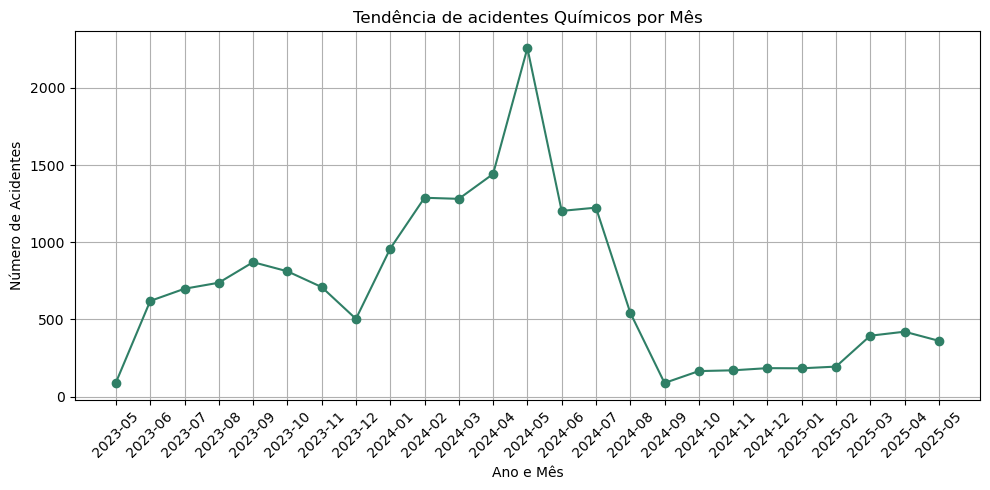

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(acidentes_por_mes['ano_mes'], acidentes_por_mes['quantidade'], marker='o', color='#2f7f66') 

plt.xticks(rotation=45)
plt.title('Tendência de acidentes Químicos por Mês')
plt.xlabel('Ano e Mês')
plt.ylabel('Número de Acidentes')
plt.tight_layout()
plt.grid()
plt.show()

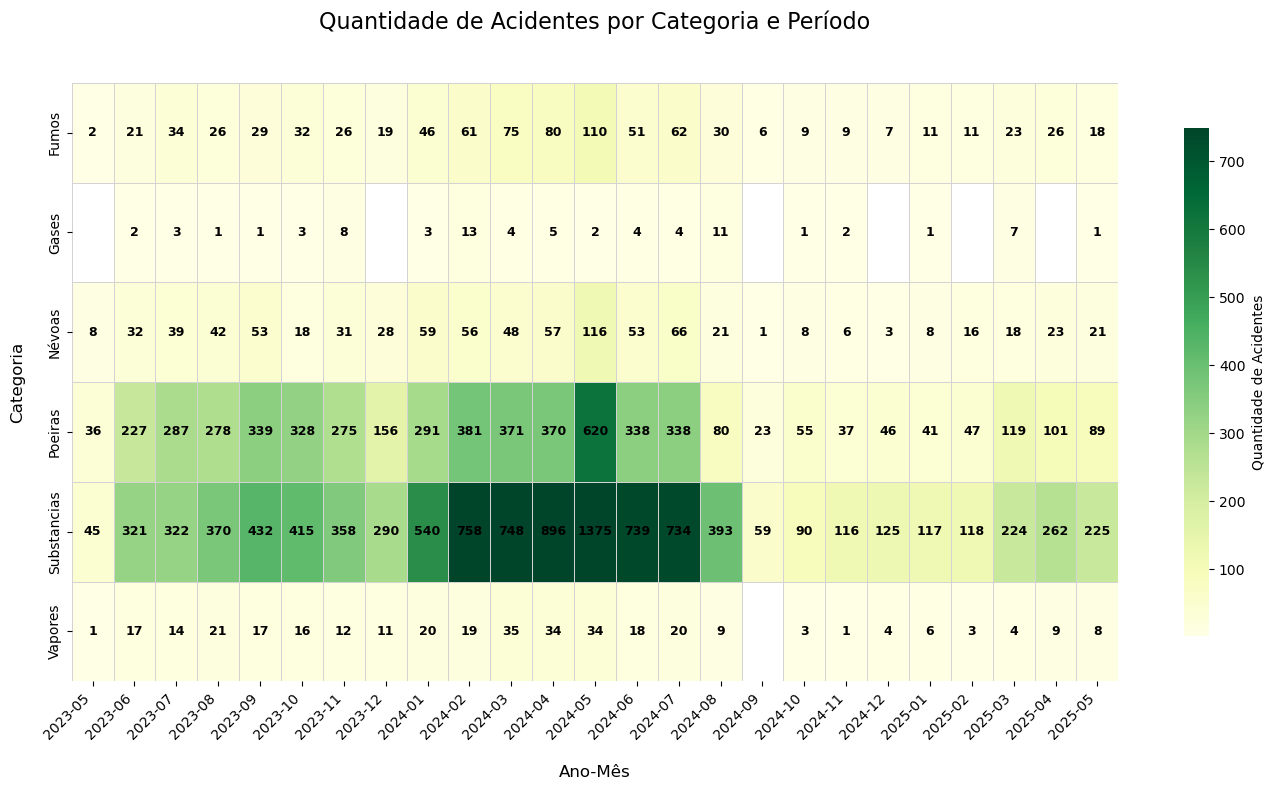

In [26]:
heatmap_data = acidentes_por_categoria_e_mes.pivot(
    columns="ano_mes", 
    values="quantidade",
    index="Categoria_FQ")


plt.figure(figsize=(14, 8))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".0f", 
    cmap="YlGn",
    linewidths=0.5, 
    linecolor="lightgray", 
    cbar=True,
    cbar_kws={
        'label': 'Quantidade de Acidentes',
        'shrink': 0.85
    },
    annot_kws={
        'fontsize': 9,
        'fontweight': 'bold',
        'color': 'black'
    },
    mask=heatmap_data.isnull(),  # oculta espaços vazios
    robust=True                  # ajusta escala para valores extremos
)

plt.title('Quantidade de Acidentes por Categoria e Período\n', fontsize=16, pad=20)
plt.xlabel('\nAno-Mês', fontsize=12)
plt.ylabel('Categoria\n', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

## Conclusão

Os heatmaps permitiram identificar as categorias mais críticas em cada período. A partir dele, foi possível identificar que a categoria **Substâncias** concentrou a maioria das ocorrências, seguida por **Poeiras**, enquanto as demais tiveram impacto reduzido. Isso evidencia que a manipulação, o transporte e o armazenamento inadequado de substâncias químicas representam o maior risco. Diante disso, torna-se fundamental a implementação rigorosa de **Equipamentos de Proteção Individual (EPIs)** adequados para cada categoria de risco. Além dos EPIs, **medidas de prevenção coletiva**, como treinamentos regulares, sinalização de riscos, manutenção preventiva de equipamentos e protocolos de emergência bem definidos, contribuem de forma significativa para a redução da ocorrência de acidentes.

O gráfico de tendência mensal reforçou ao mostrar um crescimento gradativo nos acidentes desde meados de 2023, resultando em um pico expressivo em maio de 2024. Esse comportamento pode indicar falhas sazonais em protocolos de segurança, aumento da produção em determinados períodos ou até ausência de medidas preventivas consistentes. Após o pico, houve queda expressiva, mas os níveis não retornaram ao patamar de 2023, reforçando a necessidade de ações preventivas constantes e revisão dos protocolos de segurança das empresas.

Em resumo, a **gestão proativa de riscos químicos**, aliada ao uso correto de EPIs e a práticas preventivas, é essencial para diminuir a frequência e a gravidade dos acidentes. Os dados analisados não apenas retratam a situação atual, mas também orientam a formulação de políticas de segurança mais eficazes.